# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study.

In [1]:
# import dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# load cvs files
mouse_metadata_filepath = "data/Mouse_metadata.csv"
study_results_filepath = "data/Study_results.csv"

# read cvs files
mouse_metadata = pd.read_csv(mouse_metadata_filepath)
study_results = pd.read_csv(study_results_filepath)

# combine the data into one data frame using a left join merger
combined_study_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
combined_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# mouse_metadata.shape
study_results.shape

(1893, 4)

In [6]:
# check number of mice
number_of_mice = len(combined_study_data["Mouse ID"].value_counts())
number_of_mice


249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_mice_id = combined_study_data[combined_study_data.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicated_mice_id

array(['g989'], dtype=object)

In [8]:
# create a clean data frame by droping the duplicate mouse (g989) by  its id
clean_combined_data = combined_study_data[combined_study_data['Mouse ID'].isin(duplicated_mice_id) == False]
clean_combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(clean_combined_data["Mouse ID"].value_counts())
number_of_mice

248

## Summary Statistics

Same code for next three cells, just using different methods to calculate summary statistics.

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# method 1:

# create a list of all druge and iterate over it
drug_list = clean_combined_data['Drug Regimen'].unique()
regimen_series = []
for drug in drug_list:
    tumor_volume = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
    regimen_series.append(tumor_volume)

# concatenate all series and transpose
summary_vol = pd.concat(regimen_series, keys=drug_list, axis=1).T
print(summary_vol)

                mean     median        var       std       sem
Ramicane   40.216745  40.673236  23.486704  4.846308  0.320955
Capomulin  40.675741  41.557809  24.947764  4.994774  0.329346
Infubinol  52.884795  51.820584  43.128684  6.567243  0.492236
Placebo    54.033581  52.288934  61.168083  7.821003  0.581331
Ceftamin   52.591172  51.776157  39.290177  6.268188  0.469821
Stelasyn   54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol  53.236507  51.818479  48.533355  6.966589  0.516398
Ketapril   55.235638  53.698743  68.553577  8.279709  0.603860
Propriva   52.320930  50.446266  43.852013  6.622085  0.544332
Naftisol   54.331565  52.509285  66.173479  8.134708  0.596466


In [10]:
# method 2:

# This method is the most straighforward, creating multiple series and putting them all together at the end.
means = clean_combined_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = clean_combined_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = clean_combined_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stds = clean_combined_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = clean_combined_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_table = pd.DataFrame({"Mean":means,
                              "Median":medians,
                              "Var":variances,
                              "Std":stds,
                              "Sem":sems
})

summary_table

,Mean,Median,Var,Std,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# method 3:

# This method produces everything in a single groupby function
summary_stat = clean_combined_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stat

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Drug Regimen vs Number of Mice')

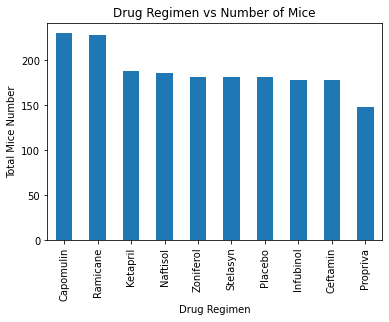

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_plot_data = clean_combined_data.groupby("Drug Regimen")['Drug Regimen'].count()
bar_plot_data = bar_plot_data.sort_values(ascending=False)

bar_chart = bar_plot_data.plot.bar()
bar_chart.set_ylabel('Total Mice Number')
bar_chart.set_title('Drug Regimen vs Number of Mice')

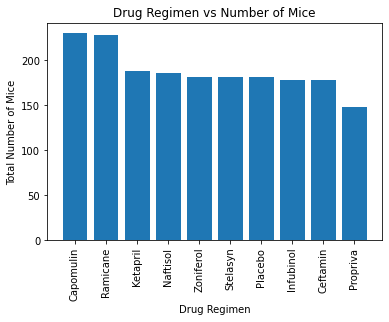

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot. 
mice_number = bar_plot_data.keys()
plt.bar(mice_number, bar_plot_data, align='center')
plt.title('Drug Regimen vs Number of Mice')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Mice')
plt.xticks(rotation=90)
plt.show()

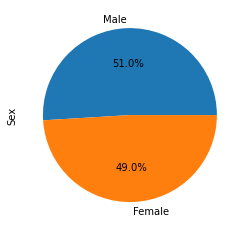

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_chart_data = clean_combined_data.groupby('Sex')['Sex'].count()
pie_chart_data = pie_chart_data.sort_values(ascending=False)
pie_chart = pie_chart_data.plot.pie(autopct='%1.1f%%')

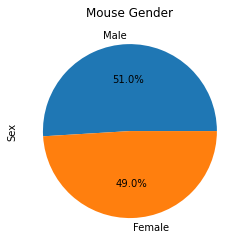

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
plt.pie(pie_chart_data, labels=labels, autopct='%1.1f%%')
plt.title('Mouse Gender')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_df = clean_combined_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
max_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [25]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_merge = clean_combined_data.merge(max_df, on=['Mouse ID', 'Timepoint'], how="left")
max_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
# Put treatments into a list for for loop (and later for plot labels)

# treatments_list = max_merge['Drug Regimen'].unique()
treatments_list = ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments_list:
    final_tumor_vol = max_merge.loc[max_merge['Drug Regimen'] ==      drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append( final_tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25, .50, .75])
    lowerq = quartiles[0.25]
    higherq = quartiles[0.75]
    iqr = higherq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = higherq + (1.5 * iqr)
    outliers = final_tumor_vol.loc[( final_tumor_vol <         lower_bound)|( final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


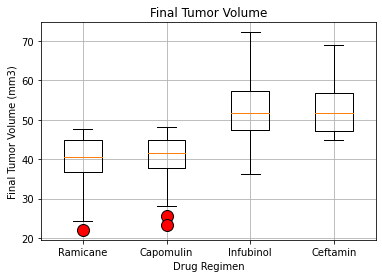

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list, flierprops=orange_out)
plt.title('Final Tumor Volume')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.grid()
plt.xticks([1, 2, 3, 4], ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

In [37]:
# generate plot data for drug regiment Capomulin
columns = ["Drug Regimen","Weight (g)",  "Timepoint", "Tumor Volume (mm3)", "Mouse ID"]
plot_data = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Capomulin", columns]
plot_data

,Drug Regimen,Weight (g),Timepoint,Tumor Volume (mm3),Mouse ID
10,Capomulin,17,0,45.000000,s185
11,Capomulin,17,5,43.878496,s185
12,Capomulin,17,10,37.614948,s185
13,Capomulin,17,15,38.177232,s185
14,Capomulin,17,20,36.866876,s185
...,...,...,...,...,...
440,Capomulin,24,45,47.685963,i557
1452,Capomulin,25,0,45.000000,r157
1453,Capomulin,25,5,45.597064,r157
1454,Capomulin,25,10,46.059608,r157


In [38]:
# line plot data for Mouse ID s185 tretment with Capomulin.
columns2 = ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]
line_plot_data = plot_data.loc[plot_data["Mouse ID"] == "s185", columns2] 
line_plot_data

,Mouse ID,Timepoint,Tumor Volume (mm3)
10,s185,0,45.000000
11,s185,5,43.878496
12,s185,10,37.614948
13,s185,15,38.177232
14,s185,20,36.866876
15,s185,25,33.949940
16,s185,30,32.959671
17,s185,35,28.328531
18,s185,40,25.472143
19,s185,45,23.343598


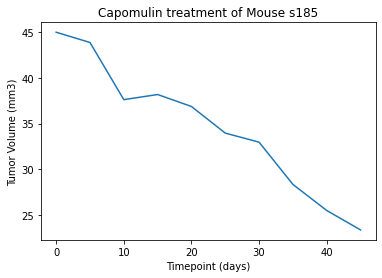

In [39]:
# Generate a line plot of time point versus tumor volume for a mouse(s185) treated with Capomulin
x_axis = line_plot_data['Timepoint']
y_axis = line_plot_data['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of Mouse s185')
plt.show()

In [40]:
# generate data for scatter, correlation and regression plots
linear_corr = plot_data.groupby('Weight (g)').mean()
linear_corr = linear_corr.reset_index()
linear_corr

,Weight (g),Timepoint,Tumor Volume (mm3)
0,15,22.500000,36.182040
1,17,21.538462,37.214133
2,19,22.500000,41.182391
3,20,22.500000,39.141053
4,21,21.666667,42.088700
5,22,22.500000,43.288490
6,23,20.217391,43.341051
7,24,22.500000,44.805810
8,25,18.214286,44.062109


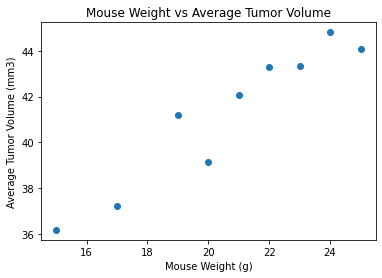

In [41]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_values = linear_corr['Weight (g)']
y_values = linear_corr['Tumor Volume (mm3)']
correlation = st.pearsonr(x_values,y_values)
plt.scatter(x_values, y_values)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume')
plt.show()

## Correlation and Regression

The correlation coefficient is 0.95


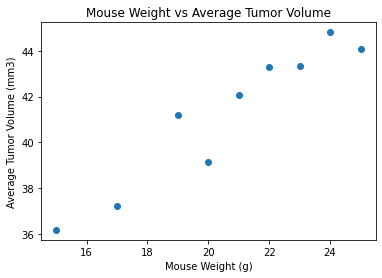

In [43]:
# Calculate the correlation coefficient model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = linear_corr['Weight (g)']
y_values = linear_corr['Tumor Volume (mm3)']
correlation = st.pearsonr(x_values,y_values)
plt.scatter(x_values, y_values)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume')
print(f"The correlation coefficient is {round(correlation[0],2)}")
plt.show()

R squared is: 0.903
y = 0.89x + 22.76


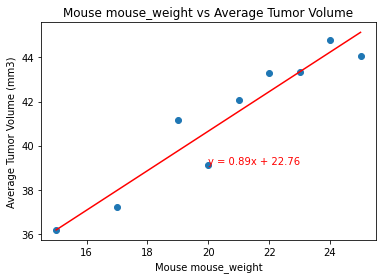

In [53]:
# Calculate the linear regression model 
# for mouse mouse_weight and average tumor volume for the Capomulin regimen
mouse_weight = linear_corr['Weight (g)']
tumor_volume = linear_corr['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_volume)

regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, tumor_volume)

plt.plot(mouse_weight,regress_values,"r")
plt.xlabel('Mouse mouse_weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(line_eq,(20, 39.14),fontsize=10,color="red")
plt.title('Mouse mouse_weight vs Average Tumor Volume')

print(f"R squared is: {round(rvalue**2, 3)}")
print(line_eq)
plt.show()